# Визуализация принципа работы Центральной Предельной Теоремы на примере экспоненциального распределения

Ц.П.Т утверждает, что сумма достаточно большого количества слабо зависимых случайных величин, имеющих примерно одинаковые масштабы (ни одно из слагаемых не доминирует, не вносит в сумму определяющего вклада), имеет распределение, близкое к нормальному

In [5]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

In [6]:
# генерируем выборку объёма 1000 из экспоненциального распределения со значением lambda = 1

lmbd = 1
scale = 1.0 / lmbd

expon_rv = sts.expon(scale=scale)
sample = expon_rv.rvs(size=1000)

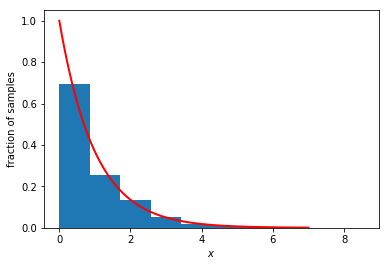

In [7]:
# строим гистограмму выборки
plt.hist(sample, normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

# и теоретическую плотность распределения поверх неё

x = np.linspace(0,7,100)
cdf = expon_rv.pdf(x)
plt.plot(x, cdf, label='theoretical CDF', lw=2, color="red")

plt.show()

Формулы для мат.ожидания и дисперсии:

$$E[X] = \lambda^{-1}$$
$$D[X] = \lambda^{-2}$$

где $\lambda$ в нашем случае = 1

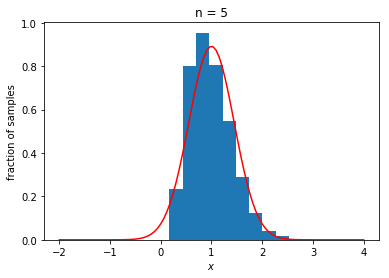

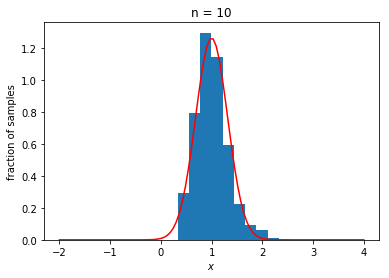

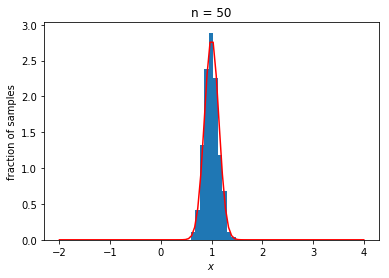

In [102]:
# генерируем по 1000 выборок объёма n, строим распределения выборочных средних

n_size = [5, 10, 50]

# среднее значение одинаково для всех n, scale = 1 \ lambda
mean = scale

for n in n_size:

    # Строим гистограмму средних выборочных
    sample_averages = [np.mean(expon_rv.rvs(size=n)) for x in range(1000)]
    plt.hist(sample_averages, normed=True)
    plt.ylabel('fraction of samples')
    plt.xlabel('$x$')
    
    # Генерируем и строим нормальное распределение 
    std = np.sqrt(scale ** 2 / n) # считаем стандартное отклонение для нормального распределения по формуле
    norm_rv = sts.norm(mean, std)
    x = np.linspace(-2,4,100)
    norm_pdf = norm_rv.pdf(x)
    plt.plot(x, norm_pdf, color="red")
    plt.title("n = {}".format(n))

    plt.show()

Как мы можем заметить, с ростом n точность аппроксимации увеличивается